# PCA

$X = (\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_n)$ is a collection of vectors encoding some information.

We want to find a direction in space along which data vary the most.

Firstly, center the data:

$\overline{\mathbf{x}}_i = \mathbf{x}_i - \frac{1}{n}\sum_{k=1}^n{\mathbf{x}_k}$

Given a direction $\mathbf{v}$ (i.e. unit vector) the projection of $\overline{\mathbf{x}}_i$ on it will be $\overline{\mathbf{x}}_i^T \mathbf{v}$.

We can project all centered points with one matrix multiplication: $\mathbf{p} = \overline{X}^T \mathbf{v}$.

$\mathbf{p}$ is the resulting vector of projections.

Our goal is to find unit $\mathbf{v}$ which maximizes $Var[\mathbf{p}] = \frac{1}{n}\sum_{i=0}^n{(p_i - E[\mathbf{p}])^2}$.

Since data is centered, $E[\mathbf{p}] = 0$. Hence 

$Var[\mathbf{p}] = \frac{1}{n}\sum_{i=0}^n{p_i^2} = \frac{1}{n}\mathbf{p}^T \mathbf{p} = \frac{1}{n} \mathbf{v}^T \overline{X} \overline{X}^T \mathbf{v}$.

We already know how to maximize this expression! The answer is the eigenvector of $\frac{1}{n} \overline{X} \overline{X}^T$ which corresponds to the greatest eigenvalue. Moreover, if $\mathbf{v}$ is an eigenvector:

$Var[\mathbf{p}] = \mathbf{v}^T \frac{1}{n} \overline{X} \overline{X}^T \mathbf{v} = \lambda \mathbf{v}^T \mathbf{v} = \lambda$.


# Toy example: Artificial Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook
plt.rcParams['figure.dpi'] = 150

# pca takes centered data matrix
def pca(data):
    covariance_matrix = (data @ data.transpose()) / data.shape[1]
    
    eigvals, eigvecs = np.linalg.eig(covariance_matrix)
    
    sorted_idx = np.argsort(eigvals)[::-1]
    
    return eigvals[sorted_idx], eigvecs[:,sorted_idx]

In [2]:
# Number of data points
N = 100

# Data dimension
D = 3

data = np.random.normal(size=(D, N))

eigvals, eigvecs = pca(data)
# Eigenvalues are real and positive
print(eigvals)

# Eigenvectors are orthogonal
products = eigvecs.transpose() @ eigvecs
print(products)

[1.43977717 0.88214687 0.77420113]
[[ 1.00000000e+00 -3.92680044e-16  4.08214028e-16]
 [-3.92680044e-16  1.00000000e+00  1.32025880e-15]
 [ 4.08214028e-16  1.32025880e-15  1.00000000e+00]]


<IPython.core.display.Javascript object>


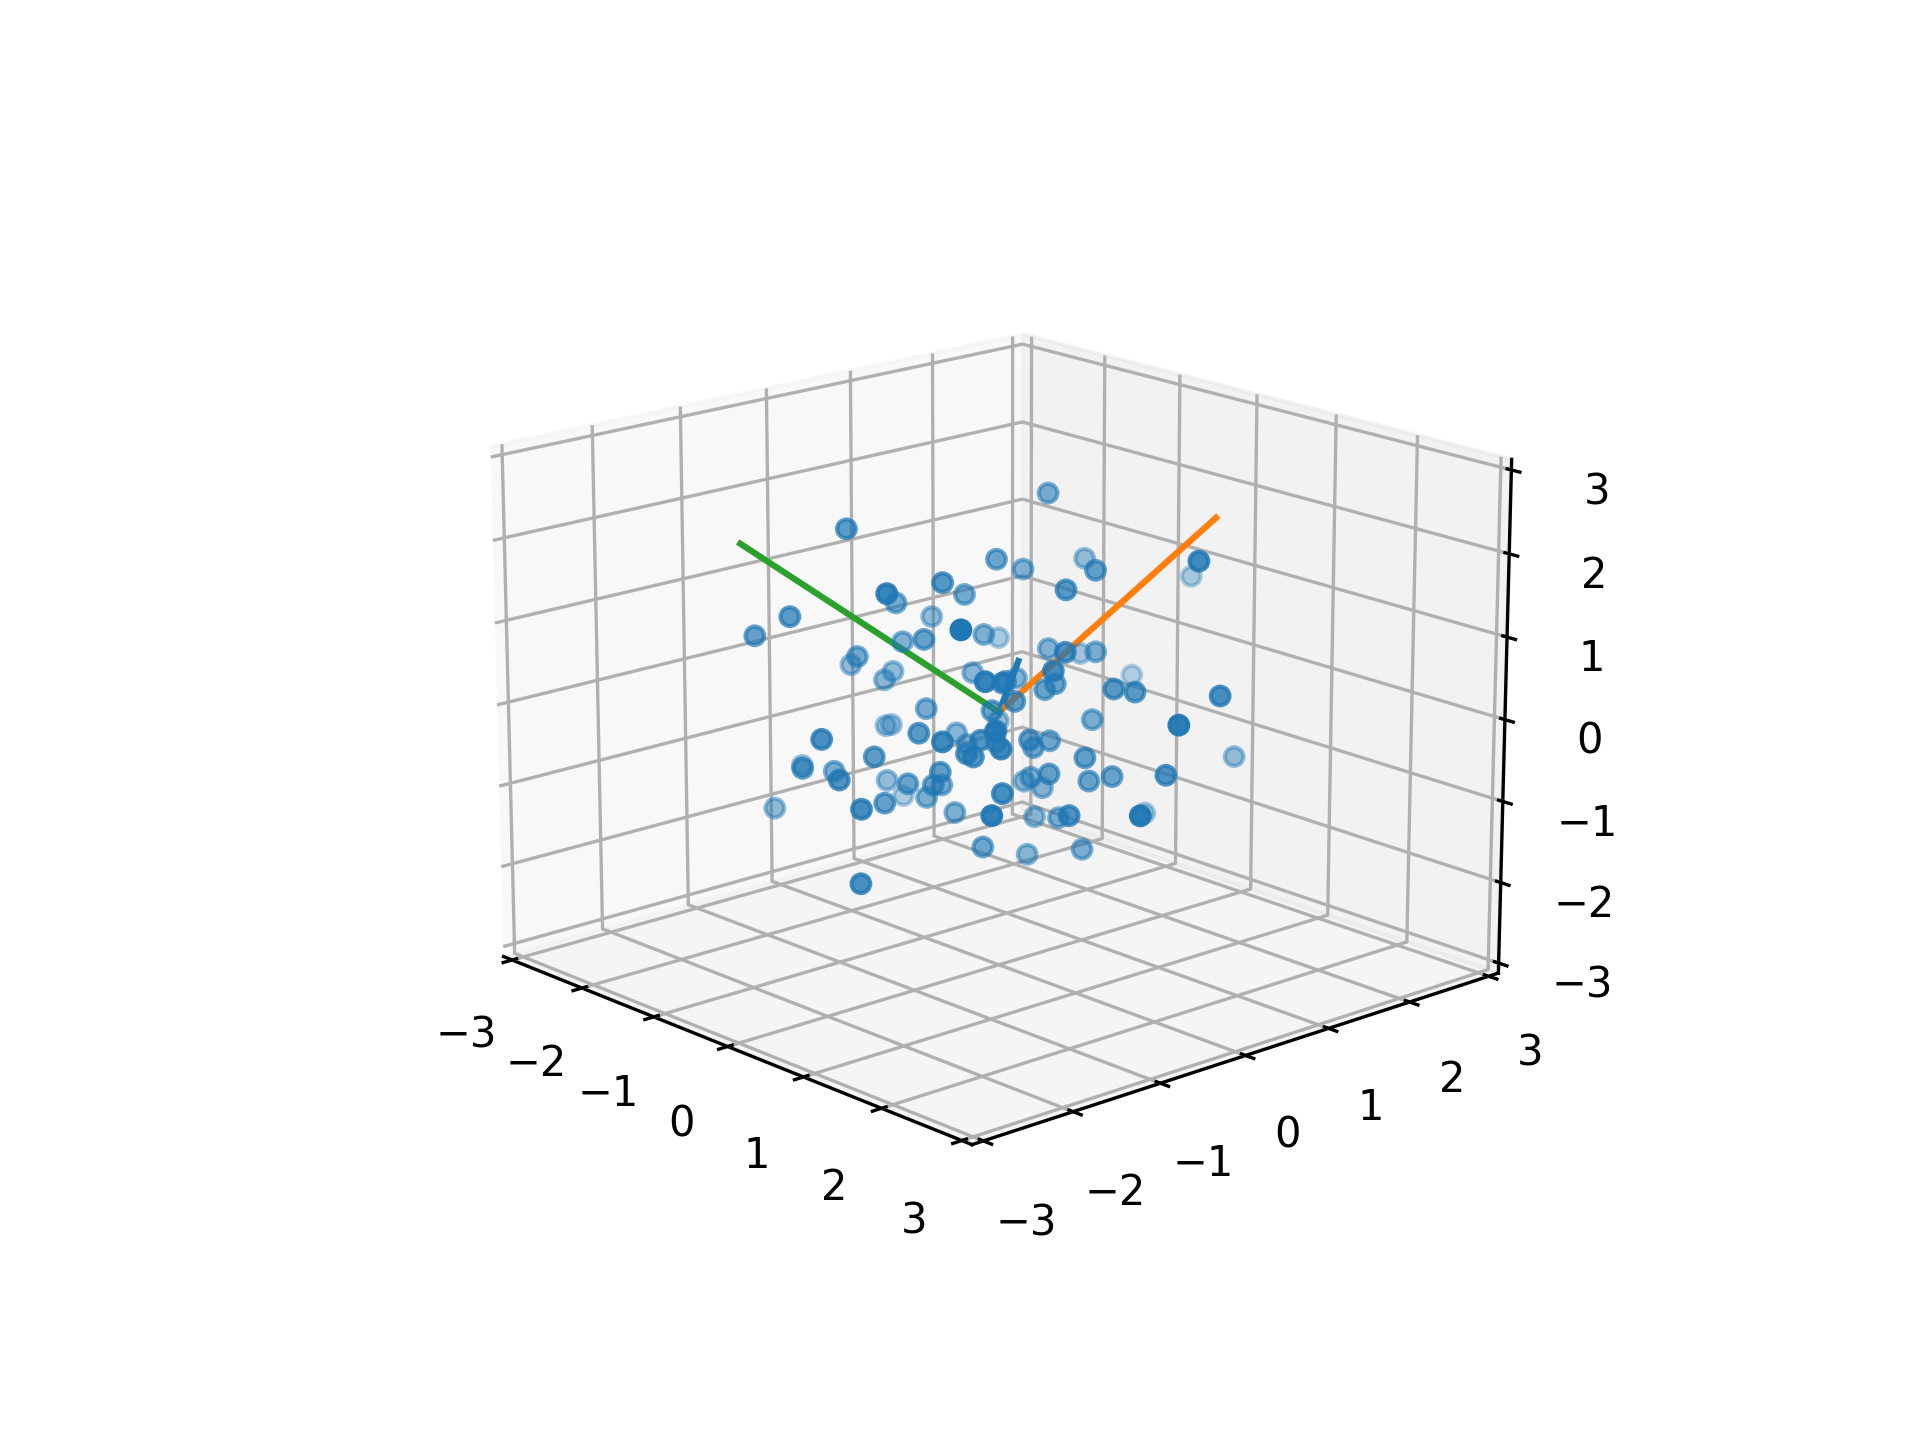

In [3]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

ax.scatter(data[0], data[1], data[2])
for v in np.transpose(eigvecs):
    ax.plot3D([0, v[0]*3], [0, v[1]*3], [0, v[2]*3])

In [4]:
# Number of data points
N = 100

# Data dimension
D = 2

# Random Embedding Matrix
embedding = np.random.normal(size=(3, 2))
data = embedding @ np.random.normal(size=(D, N)) + np.random.normal(size=(3, N))*0.1

eigvals, eigvecs = pca(data)
print(f'Eigenvalues are {eigvals}')

Eigenvalues are [2.90016335 0.07451699 0.0089943 ]


<IPython.core.display.Javascript object>


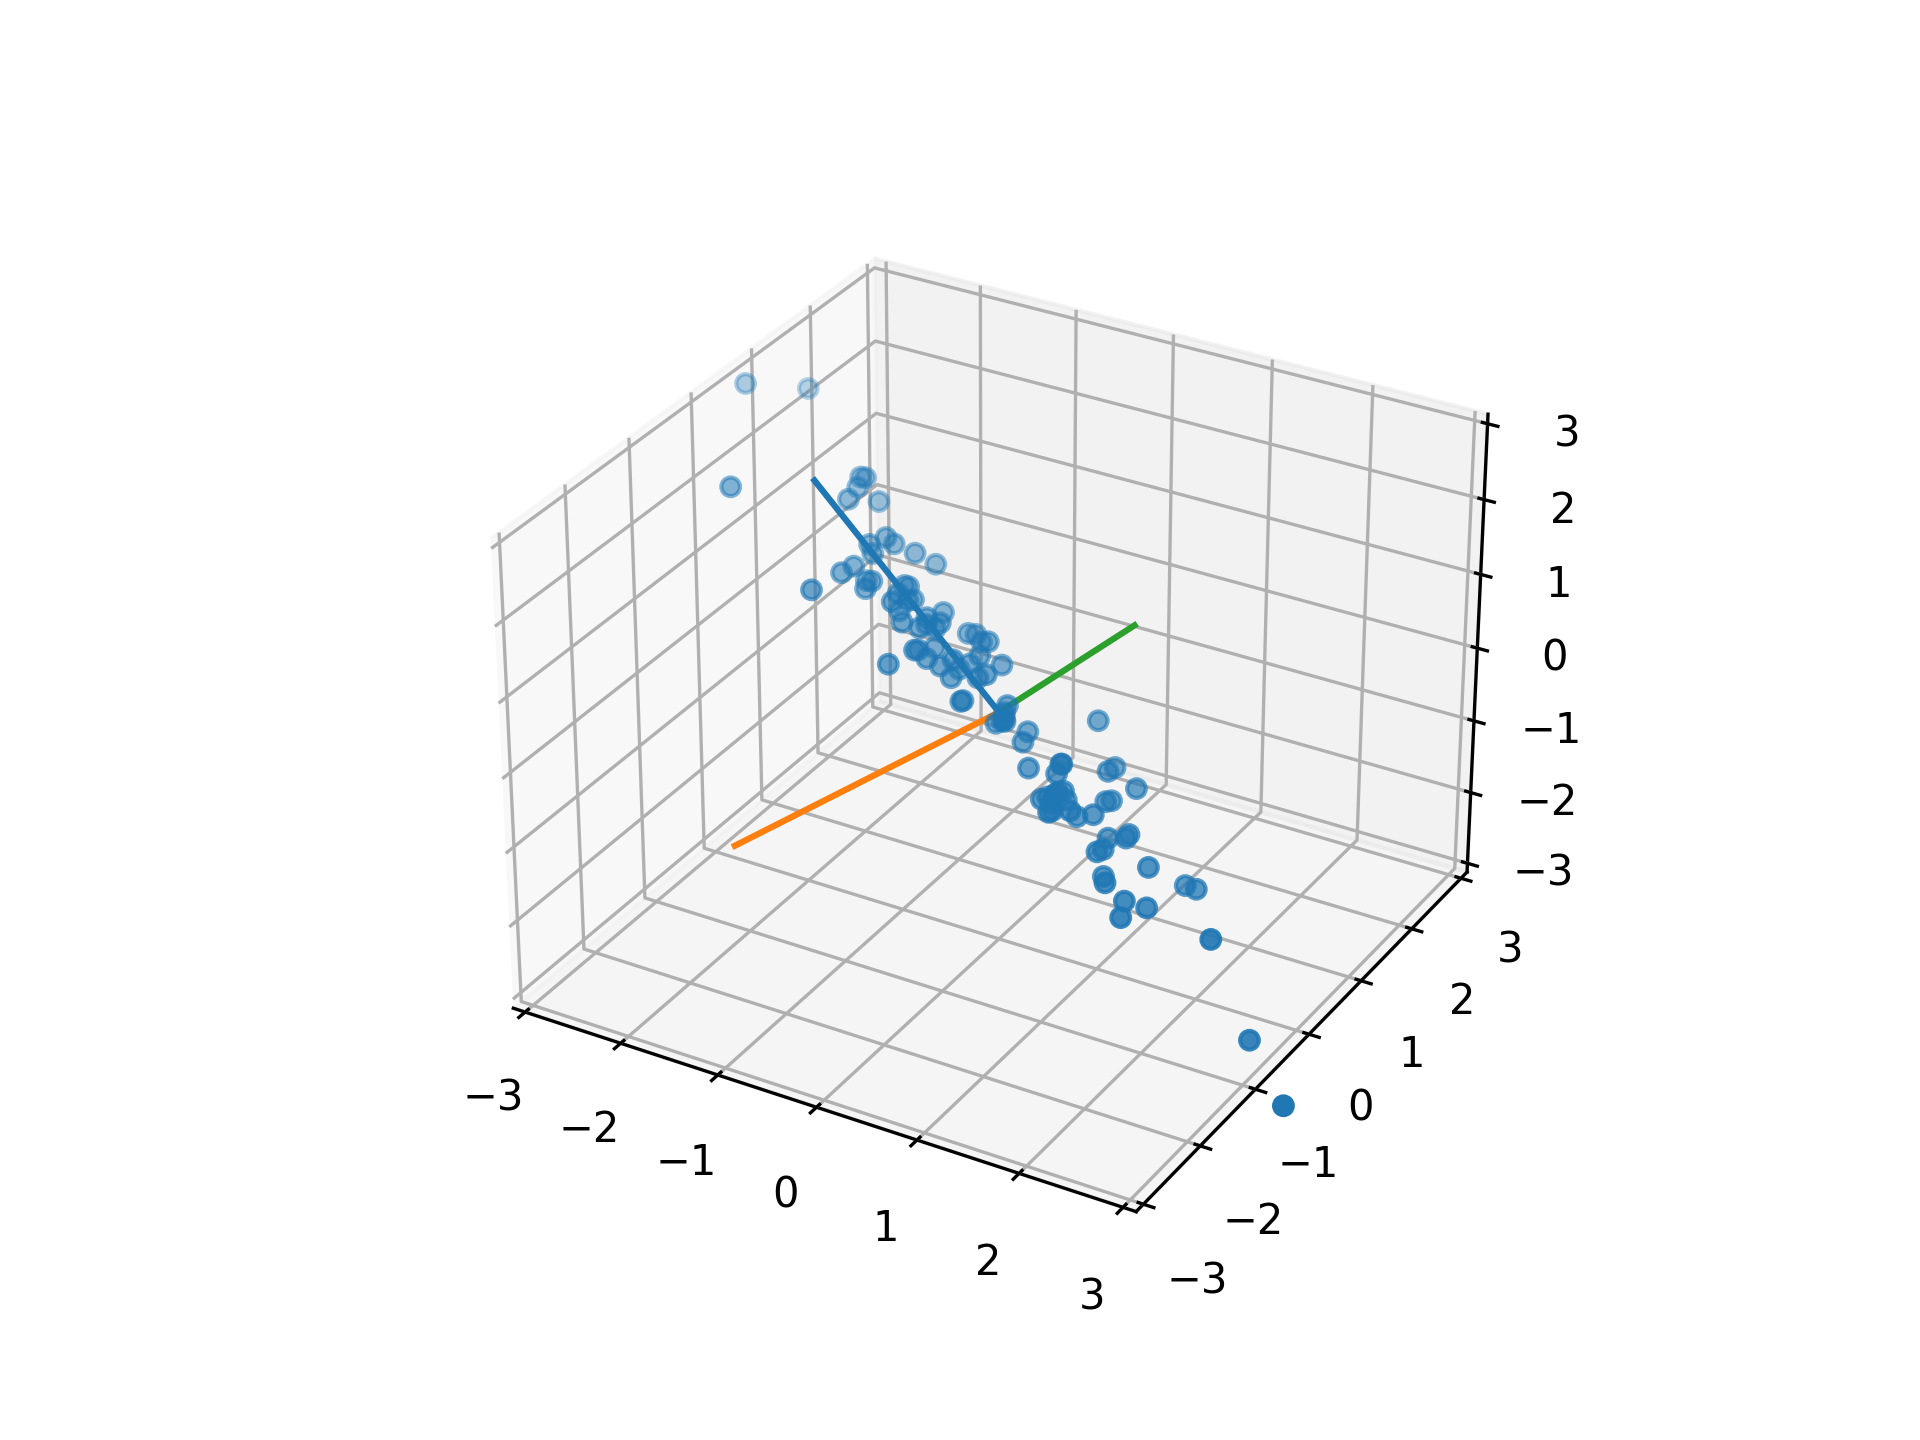

In [5]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

ax.scatter(data[0], data[1], data[2])
for v in np.transpose(eigvecs):
    ax.plot3D([0, v[0]*3], [0, v[1]*3], [0, v[2]*3])

In [ ]:
# Transform data into eigenvectors coordinate system
transformed_data = eigvecs.transpose() @ data
print(f'Standard deviation along first eigenvector: {np.var(transformed_data[0])}')
print(f'Standard deviation along second eigenvector: {np.var(transformed_data[1])}')
print(f'Standard deviation along third eigenvector: {np.var(transformed_data[2])}')

print(f'Eigenvalues: {eigvals}')

In [ ]:
# Neglect the dimension which corresponds to the lowest eigenvalue
transformed_data[2] = 0.

# Transform to the original coordinate system
transformed_back = eigvecs @ transformed_data

average_squared_distance = np.sum((data - transformed_back)**2) / N
print(f'Average Squared Distance from original data = {average_squared_distance}')

# EigenFaces

In [9]:
import pandas as pd

df = pd.read_csv('face_data.csv')

# 400 Samples, 64x64 images in shades of gray + 1 target label = 4097
df.shape

(400, 4097)

<IPython.core.display.Javascript object>


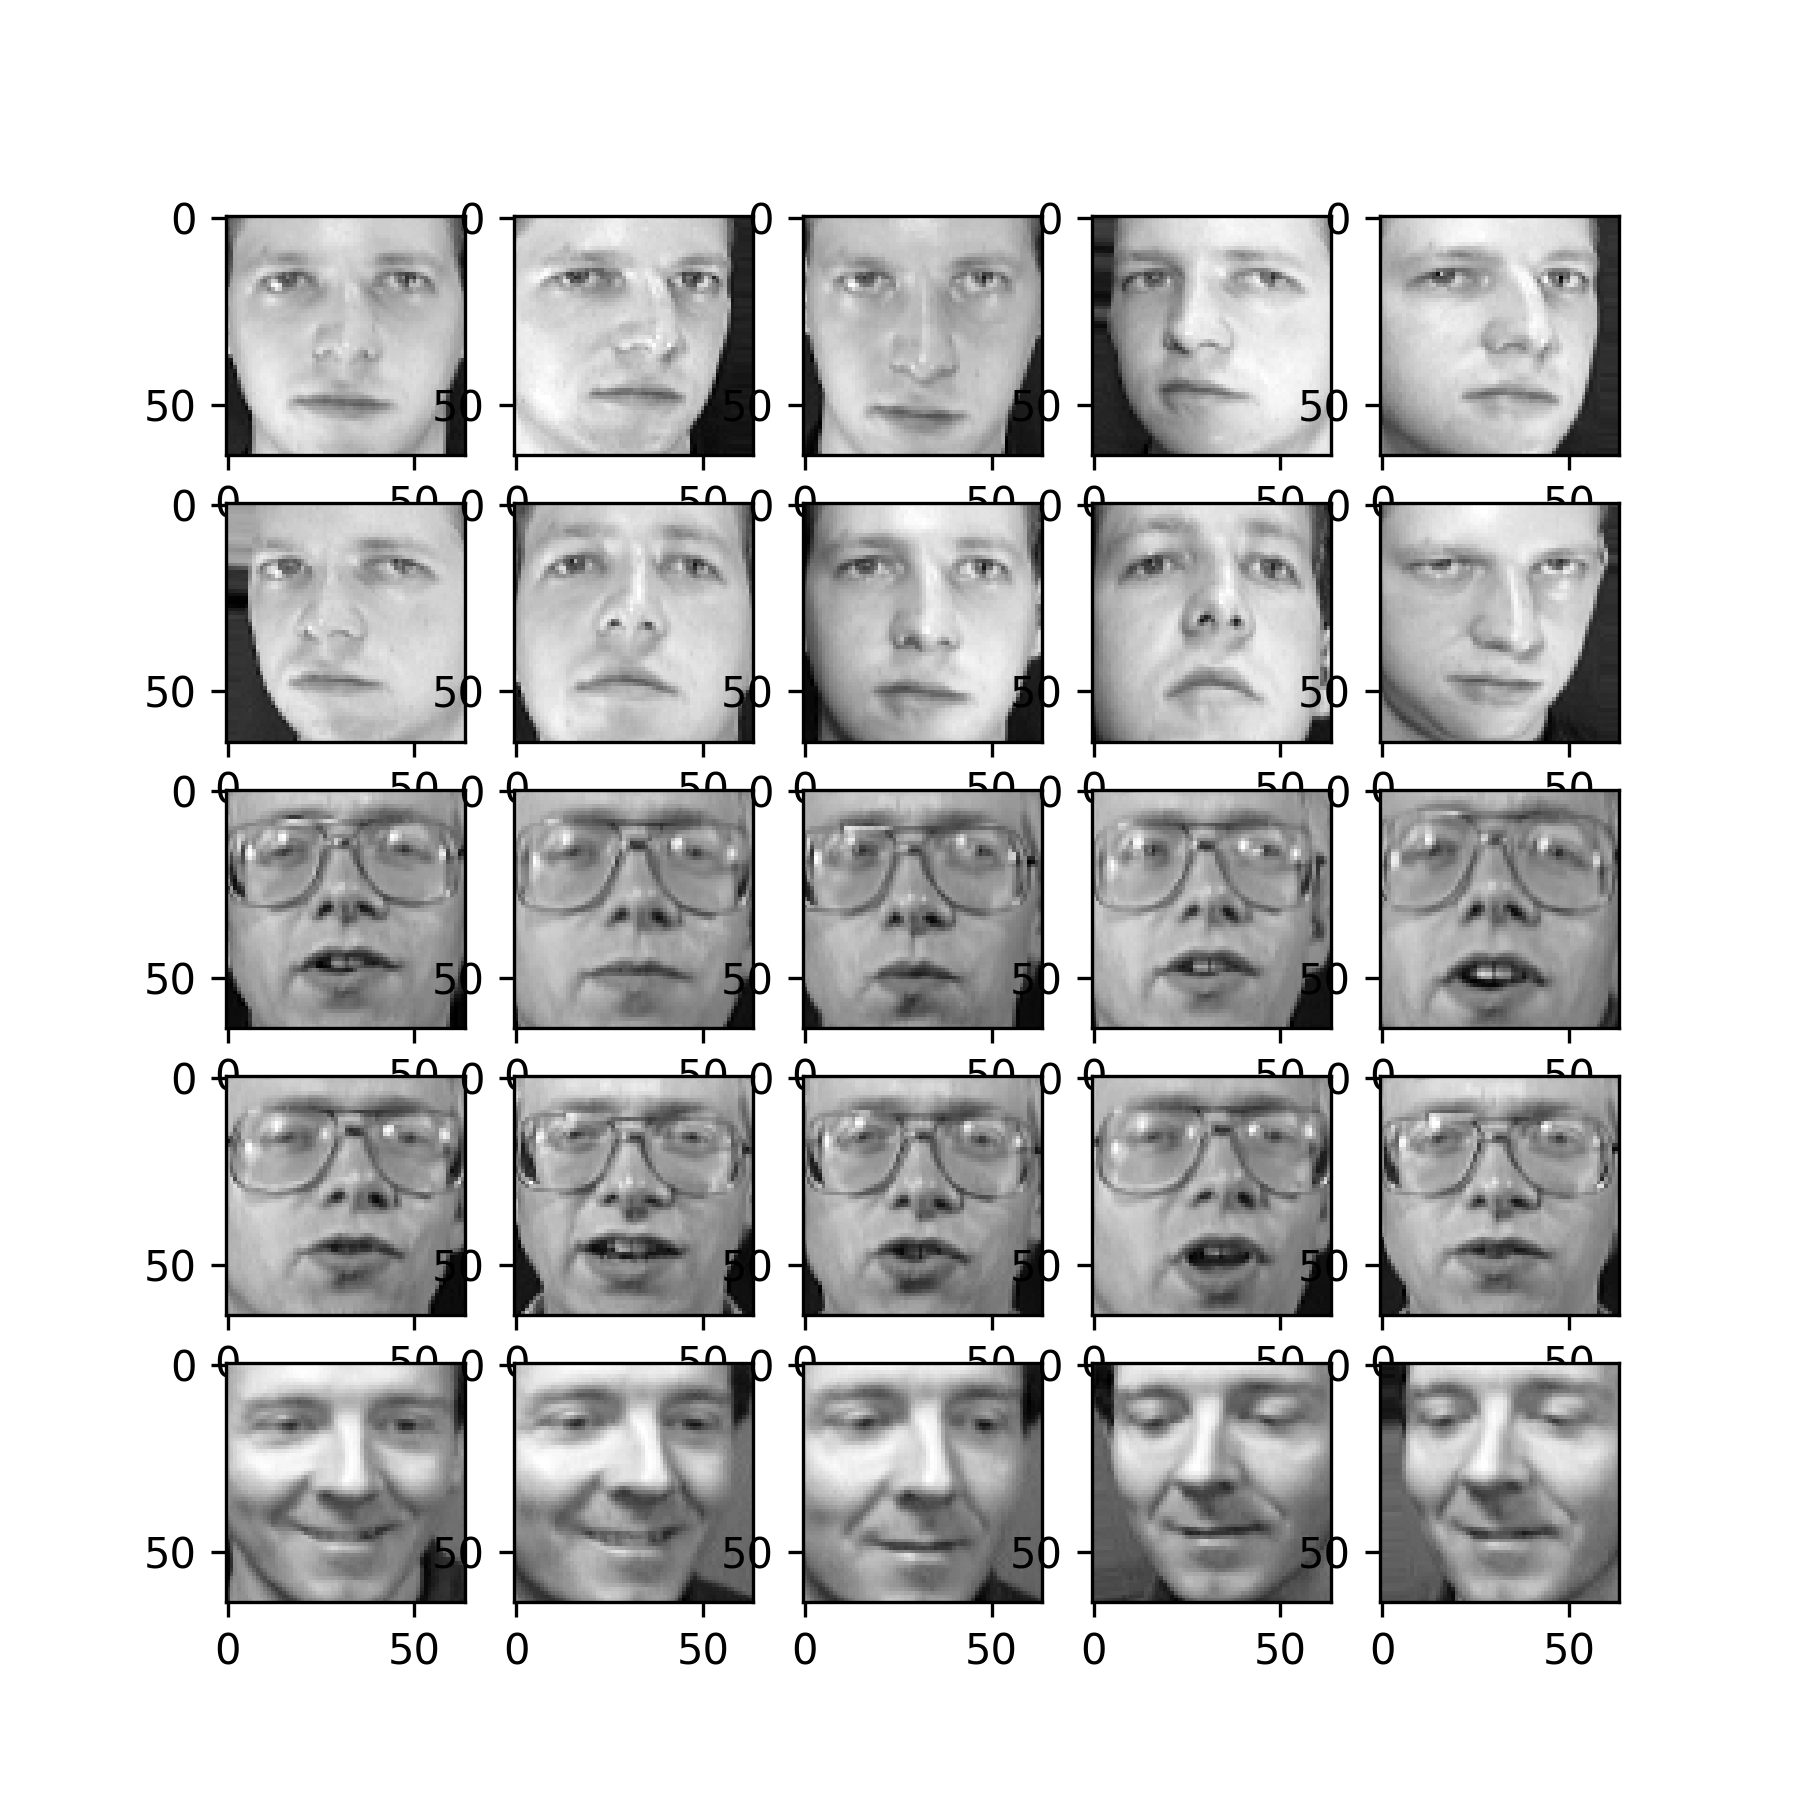

In [10]:
def plot_faces(pixels):
    fig, axes = plt.subplots(5, 5, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()
    
X = df.drop('target', axis=1)
y = df['target']

plot_faces(X)

In [11]:
# Bring the data to the format for our pca function
data = np.array(X).transpose()

# Center the data
center = np.mean(data, axis=1)

centered_data = data - center.reshape(-1, 1)

In [12]:
# Compute PCA. (Better to use iterative approximations...)
eigvals, eigvecs = pca(centered_data)
eigvals, eigvecs = np.real(eigvals), np.real(eigvecs)
print(f'First 20 eigenvalues are {eigvals[:20]}')

First 20 eigenvalues are [18.7930752  11.04408256  6.28885306  3.9446976   2.84890251  2.49146567
  1.91526311  1.60713096  1.54534935  1.3196434   1.25895363  1.13406789
  0.98393167  0.90532084  0.8388259   0.77161973  0.72532505  0.64365279
  0.59495997  0.58952257]


<IPython.core.display.Javascript object>


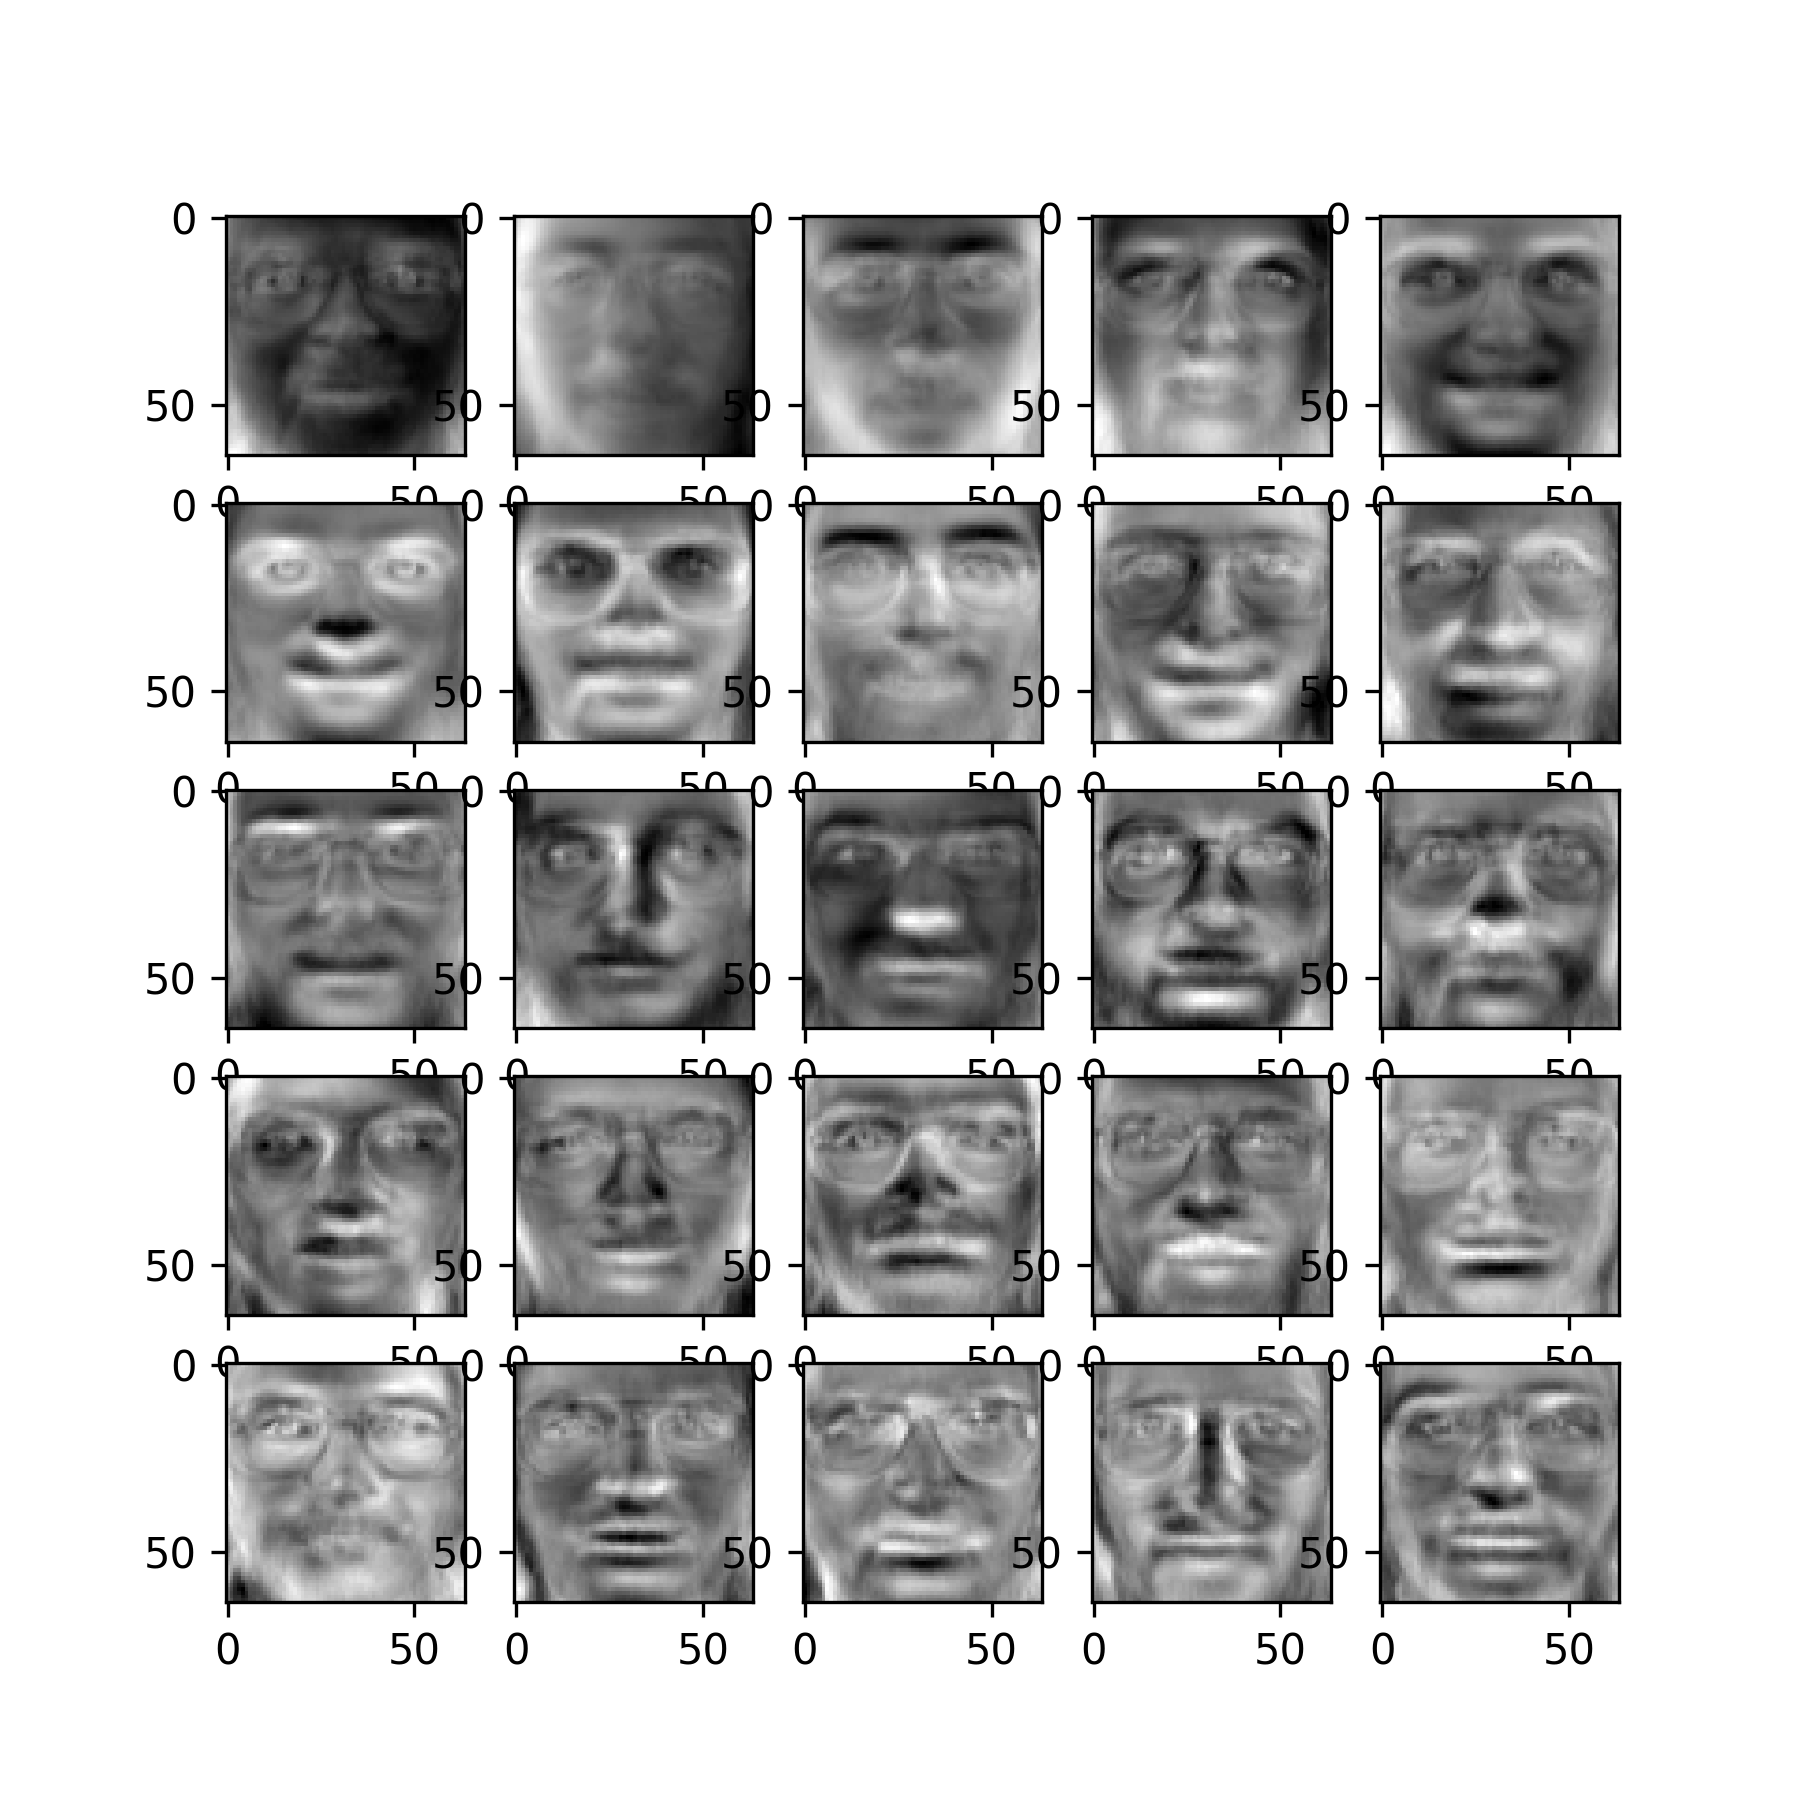

In [13]:
# Plot eigenfaces
eigenfaces = eigvecs.transpose() + center.reshape(-1, 1)
plot_faces(eigenfaces)

Shape of the transformed data is (40, 400)


<IPython.core.display.Javascript object>


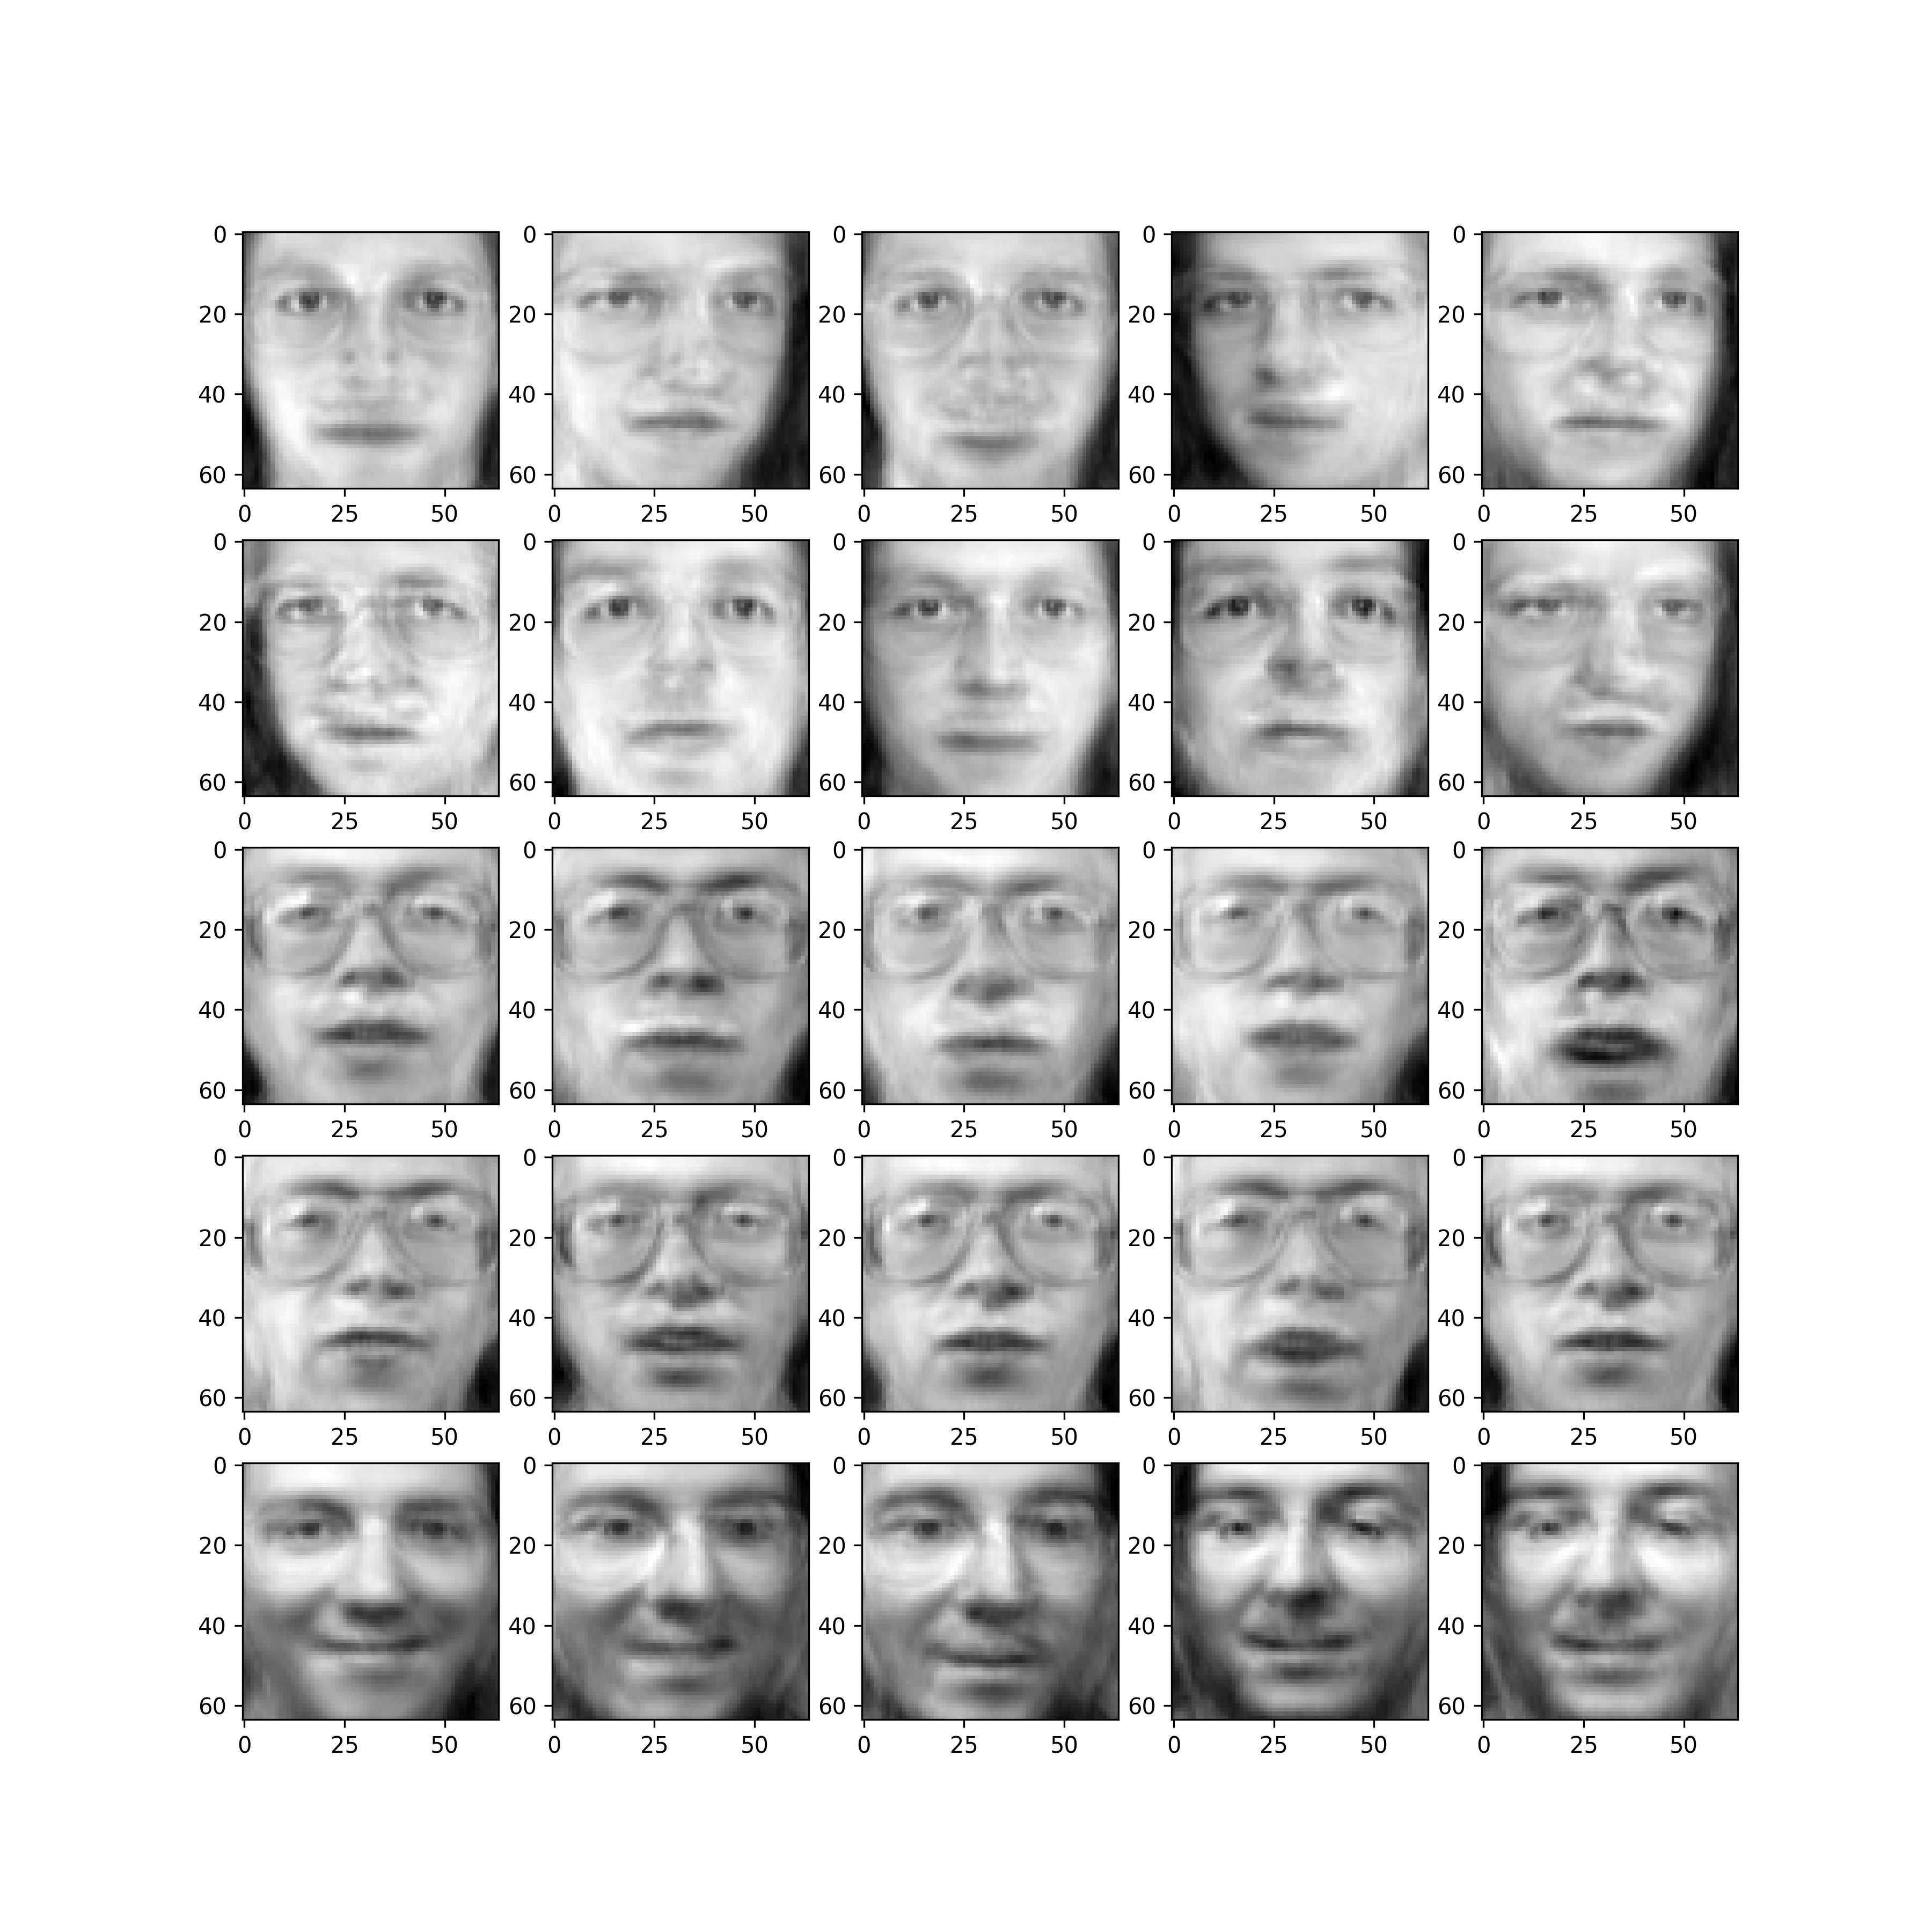

In [14]:
# Project to first 40 eigenvectors
transformed_data = eigvecs.transpose()[:40] @ centered_data

print(f'Shape of the transformed data is {transformed_data.shape}')

transformed_back = eigvecs[:, :40] @ transformed_data + center.reshape(-1, 1)

plot_faces(transformed_back.transpose())